In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
# Load the JSON data
with open("./metrics/newArticle5000_gasUsed_1747873342503.json") as f:
    gas_data = json.load(f)

with open("./metrics/newArticle5000_time_1747873342434.json") as f:
    time_data = json.load(f)

In [10]:
# Convert to numpy arrays for easier analysis
gas = np.array(gas_data)
time = np.array(time_data)

In [11]:
# Basic statistics
gas_stats = {
    "mean": np.mean(gas),
    "median": np.median(gas),
    "std_dev": np.std(gas),
    "min": np.min(gas),
    "max": np.max(gas)
}

time_stats = {
    "mean": np.mean(time),
    "median": np.median(time),
    "std_dev": np.std(time),
    "min": np.min(time),
    "max": np.max(time)
}

# Efficiency metrics
gas_per_byte = gas / 5000
time_per_byte = time / 5000

# Trend analysis using linear regression
x = np.arange(len(gas))
gas_trend = linregress(x, gas)
time_trend = linregress(x, time)

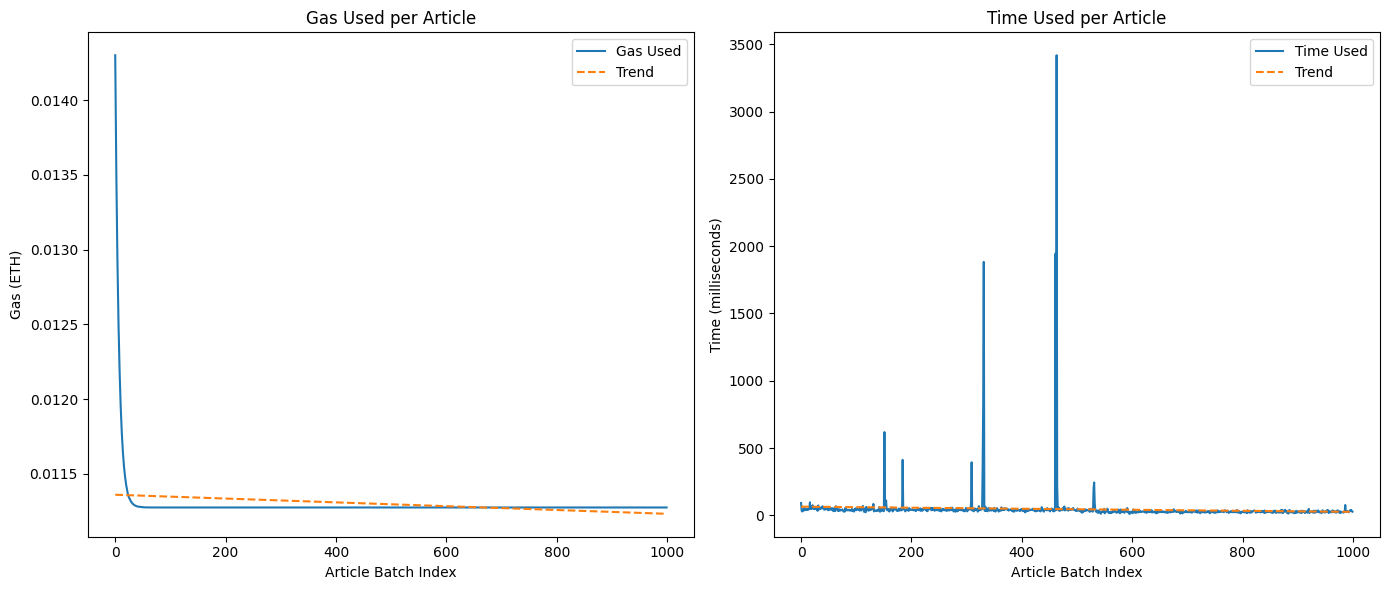

In [12]:
# Plotting gas and time trends
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(gas, label="Gas Used")
plt.plot(gas_trend.intercept + gas_trend.slope * x, label="Trend", linestyle="--")
plt.title("Gas Used per Article")
plt.xlabel("Article Batch Index")
plt.ylabel("Gas (ETH)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, label="Time Used")
plt.plot(time_trend.intercept + time_trend.slope * x, label="Trend", linestyle="--")
plt.title("Time Used per Article")
plt.xlabel("Article Batch Index")
plt.ylabel("Time (milliseconds)")
plt.legend()

plt.tight_layout()
plt.savefig("./metrics/wiki_article_metrics.png")

In [13]:
(gas_stats, time_stats, gas_trend, time_trend, "./metrics/wiki_article_metrics_5000.png")

({'mean': 0.011297132192381952,
  'median': 0.011275570049612509,
  'std_dev': 0.0001860998044462741,
  'min': 0.01127554137561588,
  'max': 0.014300952186689845},
 {'mean': 45.16178207100004,
  'median': 34.13661800000227,
  'std_dev': 141.49402831049906,
  'min': 11.366728000000876,
  'max': 3418.6468800000002},
 LinregressResult(slope=-1.276604652936044e-07, intercept=0.011360898594796108, rvalue=-0.19802483771820004, pvalue=2.668284282718858e-10, stderr=2.000252658836413e-08, intercept_stderr=1.15398024010216e-05),
 LinregressResult(slope=-0.03855859283131918, intercept=64.42179919024397, rvalue=-0.07866693416549544, pvalue=0.012831474175092379, stderr=0.015467342146677356, intercept_stderr=8.923376317143914),
 './metrics/wiki_article_metrics_5000.png')